In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from collections import Counter

In [11]:
!unzip Fastas_test1.zip


Archive:  Fastas_test1.zip
replace content/drive/MyDrive/Fastas_test1/0_CSNK2B_NDUFA6/0_CSNK2B_NDUFA6.fa? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
y

In [2]:
import os
import numpy as np
print('Si comincia!')
matrices = []
labels = []
sequences=[]
n = 0
seq_len = 750
root = 'Fastas'
headers=[]
def padding(matrix,seq, seq_len):
  matrix = np.pad(matrix,((0, 0), (0, seq_len - matrix.shape[1]), (0, seq_len - matrix.shape[2])),constant_values=(-55,-55))
  seq = np.pad(seq,pad_width=((0, seq_len - len(seq))),constant_values=-55)
  
  return matrix,seq





def crop(matrix,seq, protein_len):
  index_start = np.random.randint(0, protein_len - seq_len)
  seq = seq[index_start:index_start+seq_len]
  
  matrix = matrix[:, index_start:index_start+seq_len, index_start:index_start+seq_len]
  return matrix,seq

for el in list(os.listdir(root)):
  name_pkl = root+'/'+el+'/'+el+'_prediction.pkl'
  name_fa = root+'/'+el+'/'+el+'.fa'
  if os.path.isfile(name_pkl):
    pkl = np.load(name_pkl, allow_pickle=True)
    
    sequence = pkl['ss']
    protein_len = sequence.shape[1]
    
    sequence=list(pkl['seq'])
    
    matrix = pkl['dist']
    if protein_len < seq_len:
        matrix,sequence = padding(matrix,sequence, seq_len)
        
    if protein_len > seq_len:
        
        matrix,sequence = crop(matrix,sequence, protein_len)
        
    distbin = np.zeros_like(matrix[0])
    for i in range(10):
      distbin += pkl['dist_bin_map'][i]*matrix[i]
    matrices.append(np.array(distbin).flatten())
    sequences.append(np.copy(sequence))
    with open(name_fa, 'r') as f:
      header=str(f.readlines())
      headers.append(header)
      label = int((header.split(',')[1]).split(':')[1])
      labels.append(label)
      
    n += 1
dataset=np.vstack(matrices)

sequences=np.vstack(sequences)

Si comincia!


In [10]:
Counter(labels)

Counter({0: 546, 1: 456})

In [3]:
np.stack(sequences)

array([['M', 'K', 'S', ..., '-', '-', '-'],
       ['M', 'K', 'S', ..., '-', '-', '-'],
       ['M', 'V', 'H', ..., '-', '-', '-'],
       ...,
       ['M', 'L', 'L', ..., '-', '-', '-'],
       ['M', 'P', 'Y', ..., '-', '-', '-'],
       ['M', 'L', 'L', ..., '-', '-', '-']], dtype='<U1')

In [4]:
X_train,X_test, y_train,y_test= train_test_split(dataset,labels, stratify=labels, test_size=0.2)

For Random Forest
RandomForestClassifier(bootstrap=False, random_state=1)
0.9076082932247316
On the test set :0.8702702702702703


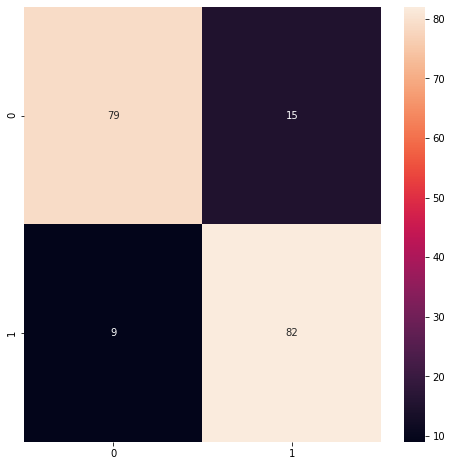

In [7]:
model=RandomForestClassifier()
params = {
        'criterion': ["gini", "entropy"],
        'max_features': ["auto", "sqrt", "log2"],
        'random_state': [1],
        'bootstrap': [True, False]
    }
print(f'For Random Forest')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('fig/conf_matrix_rf.png')
plt.show()

In [ ]:
model= LinearSVC()
params = {
    
    'C' : [ 0.1, 1, 10, 1000],
    
}
print(f'For linear SVC')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('fig/conf_matrix_linearsvc.png')
plt.show()

For linear SVC


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import os
import numpy as np
print('Si comincia!')
matrices = []
labels = []
sequences=[]
n = 0
seq_len = 1000
root = 'Fastas'
numbers=[]
def padding(seq, seq_len):
  #matrix = np.pad(matrix,((0, 0), (0, seq_len - matrix.shape[1]), (0, seq_len - matrix.shape[2])),constant_values=(-55,-55))
  buco= int(seq_len - len(seq))
  padding= 'X' * buco
  
  seq=seq+padding
  
  
  return seq





def crop(seq, protein_len):
  index_start = np.random.randint(0, protein_len - seq_len)
  seq = seq[index_start:index_start+seq_len]
  
  #matrix = matrix[:, index_start:index_start+seq_len, index_start:index_start+seq_len]
  return seq

for el in list(os.listdir(root)):
  name_pkl = root+'/'+el+'/'+el+'_prediction.pkl'
  name_fa = root+'/'+el+'/'+el+'.fa'
    
  if os.path.isfile(name_fa):
      numbers.append(int(el.split('_')[0]))
      with open(name_fa, 'r') as f:
          header = str(f.readlines())
          label = (header.split(',')[1]).split(':')[1]
          labels.append(label)
          
          sequence=header.split(',')[14]
          sequence=str(sequence[3:-2])
          #print(len(sequence))
          protein_len=len(sequence)
          
          if protein_len < seq_len:
              sequence = padding(sequence, seq_len)

          if protein_len > seq_len:

              sequence = crop(sequence, protein_len)
          

      sequences.append(sequence)
    
print('fine')
    



In [16]:
def create_sequence_matrix(sequence):
    encoding = {
        "A": 0, "C": 1, "D": 2,
        "E": 3, "F": 4, "G": 5,
        "H": 6, "I": 7, "K": 8,
        "L": 9, "M": 10, "N": 11,
        "P": 12, "Q": 13, "R": 14,
        "S": 15, "T": 16, "V": 17,
        "W": 18, "Y": 19, "X":20,
    }
    sequence=(str(sequence)[2:-2]).strip()
    matrix = np.zeros((21, len(sequence)))
    
    for index, el in enumerate(sequence):
        if el!='\\' and el!='n':
        
            matrix[encoding[el]][index] = 1

    return matrix

seq_conv=list(map(lambda x: create_sequence_matrix(x).flatten(), sequences))
#seq_conv
np.vstack(seq_conv)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

For Random Forest
RandomForestClassifier(criterion='entropy', random_state=1)
0.8715186213277816
On the test set :0.9027355623100304


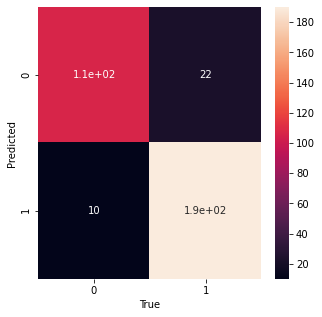

In [28]:
#SEQUENCES

X_train,X_test, y_train,y_test= train_test_split(seq_conv,labels, stratify=labels, test_size=0.2)

model=RandomForestClassifier()
params = {
        'criterion': ["gini", "entropy"],
        'max_features': ["auto", "sqrt", "log2"],
        'random_state': [1],
        'bootstrap': [True, False]
    }
print(f'For Random Forest')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('fig/conf_seq_rf.png')
plt.show()

For linear SVC


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

LinearSVC(C=0.01)
0.8699629886652787
On the test set :0.9057750759878419


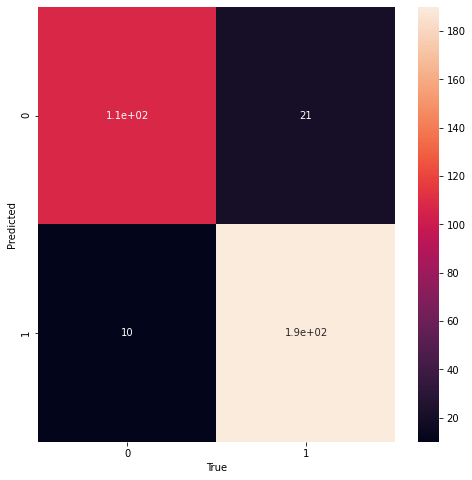

In [30]:
model= LinearSVC()
params = {
    
    'C' : [0.0001, 0.01, 0.1, 1, 10, 100, 1000],
    
}
print(f'For linear SVC')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('fig/conf_seq_linearsvc.png')
plt.show()

In [ ]:
out_path='output.txt'
with open(out_path,'+w') as f:
    for i in range(y_pred_proba):
        f.writeline(f'{header[i]},{y_pred_proba[i]}')